# Data Preprocessing

In [78]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [79]:
train = pd.read_csv('train_1.csv', sep=';')
test = pd.read_csv('test_1.csv', sep=';')

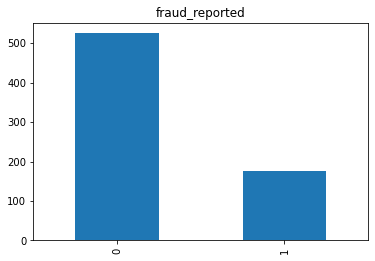

In [80]:
train['fraud_reported'].value_counts().plot(kind='bar', title= 'fraud_reported');

In [81]:
# Class count
count_class_0, count_class_1 = train.fraud_reported.value_counts()

# Divide by class
class_0 = train[train['fraud_reported'] == 0]
class_1 = train[train['fraud_reported'] == 1]

Random over-sampling:
1    525
0    525
Name: fraud_reported, dtype: int64


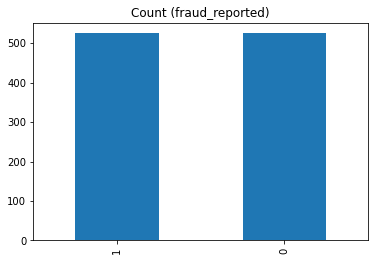

In [82]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)
print('Random over-sampling:')
print(test_over.fraud_reported.value_counts())
test_over.fraud_reported.value_counts().plot(kind='bar', title='Count (fraud_reported)');

In [83]:
X_train = test_over.iloc[:, :-1].values 
X_test = test.iloc[:, :-1].values
y_train = test_over.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression

Логистическая регрессия от всех переменных:

In [85]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [86]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.87

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[196  32]
 [  7  65]]


In [89]:
Error_rate = (7+32)/(300)
Error_rate

0.13

In [90]:
Se = 65/(65+7)
Se

0.9027777777777778

In [91]:
Sp = 196/(196+32)
Sp

0.8596491228070176

LogisticRegression: ROC AUC=0.941


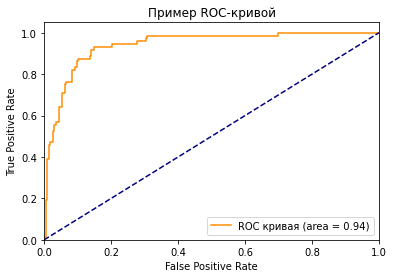

In [92]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
lr_probs = lr.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression2
на отобранных переменных

In [97]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.369327
         Iterations 26
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.467      
Dependent Variable: y                AIC:              841.5861   
Date:               2021-12-11 17:10 BIC:              1005.1521  
No. Observations:   1050             Log-Likelihood:   -387.79    
Df Model:           32               LL-Null:          -727.80    
Df Residuals:       1017             LLR p-value:      1.6230e-122
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     26.0000                                       
-------------------------------------------------------------------
         Coef.     Std.Err.     z     P>|z|     [0.025      0.975] 
-------------------------------------------------------------------
x1        0.1823     0.2551   0.7147  0.4748     -0.3177     0.6824
x2       -0.2573     0.2590  -0.9933  0.3206    

In [98]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

19
[ True  True False  True False False False False False  True  True  True
  True  True  True  True  True  True  True  True False  True False False
  True False False False  True False  True  True False]
[ 1  1  5  1 10  6  4 12 13  1  1  1  1  1  1  1  1  1  1  1  7  1 14  8
  1 11 15  3  1  9  1  1  2]


In [99]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(train.columns[column]))
    i=i+1

[0, 1, 3, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 24, 28, 30, 31]
№	Index	Feature
0	0	months_as_customer
1	1	age
2	3	policy_csl
3	9	insured_occupation
4	10	insured_hobbies
5	11	insured_relationship
6	12	capital-gains
7	13	capital-loss
8	14	incident_type
9	15	collision_type
10	16	incident_severity
11	17	authorities_contacted
12	18	incident_state
13	19	incident_city
14	21	number_of_vehicles_involved
15	24	witnesses
16	28	property_claim
17	30	auto_make
18	31	auto_model


In [100]:
# p-value < 3% Features
bas_X_train = X_train[:,[9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 24, 30, 31]]
bas_X_test = X_test[:,[9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 24, 30, 31]]

In [102]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
bas = LogisticRegression(random_state = 13).fit(bas_X_train, y_train)

In [103]:
# Predicting the Test set results
y_bas_pred = bas.predict(bas_X_test)
bas.score(bas_X_test,y_test)

0.87

In [104]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_bas_pred)
print(cm)

[[195  33]
 [  6  66]]


In [105]:
Error_rate = (6+33)/(300)
Error_rate

0.13

In [106]:
Se = 66/(66+6)
Se

0.9166666666666666

In [107]:
Sp = 195/(195+33)
Sp

0.8552631578947368

LogisticRegression: ROC AUC=0.939


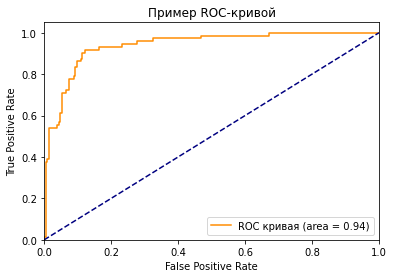

In [108]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
lr_probs2 = bas.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
lr_probs2 = lr_probs2[:, 1]
# рассчитываем ROC AUC
bas_auc = roc_auc_score(y_test, lr_probs2)
print('LogisticRegression: ROC AUC=%.3f' % (bas_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs2)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

# SVM

In [118]:
# Fitting SVM to the Training set (2 variables)
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 10,probability=True).fit(bas_X_train, y_train)

In [119]:
# Predicting the Test set results
svm_pred = svm.predict(bas_X_test)
svm.score(bas_X_test,y_test)

0.8666666666666667

In [120]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print(cm)

[[192  36]
 [  4  68]]


In [121]:
Error_rate = (4+36)/(300)
Error_rate

0.13333333333333333

In [122]:
Se = 68/(68+4)
Se

0.9444444444444444

In [123]:
Sp = 192/(192+36)
Sp

0.8421052631578947

LogisticRegression: ROC AUC=0.936


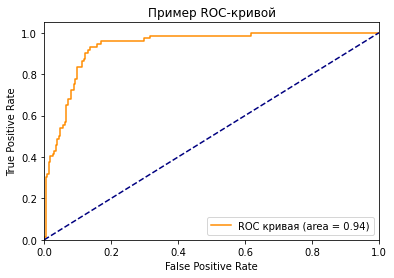

In [124]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
svm_probs = svm.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
svm_probs = svm_probs[:, 1]
# рассчитываем ROC AUC
svm_auc = roc_auc_score(y_test, svm_probs)
print('LogisticRegression: ROC AUC=%.3f' % (svm_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, svm_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [400]:
# Fitting SVM to the Training set (2 variables)
from sklearn.svm import SVC
svm1 = SVC(kernel = 'linear', random_state = 10,probability=True).fit(X_train, y_train)

In [401]:
# Predicting the Test set results
svm_pred = svm1.predict(X_test)
svm1.score(X_test,y_test)

0.8666666666666667

In [402]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print(cm)

[[192  36]
 [  4  68]]


In [404]:
Error_rate = (4+36)/(300)
Error_rate

0.13333333333333333

In [405]:
Se = 68/(68+4)
Se

0.9444444444444444

In [406]:
Sp = 192/(192+36)
Sp

0.8421052631578947

LogisticRegression: ROC AUC=0.932


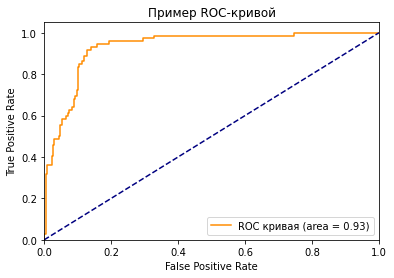

In [407]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
svm1_probs = svm1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
svm1_probs = svm1_probs[:, 1]
# рассчитываем ROC AUC
svm1_auc = roc_auc_score(y_test, svm1_probs)
print('LogisticRegression: ROC AUC=%.3f' % (svm1_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, svm1_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbors

Minimum error:- 0.13666666666666666 at K = 15


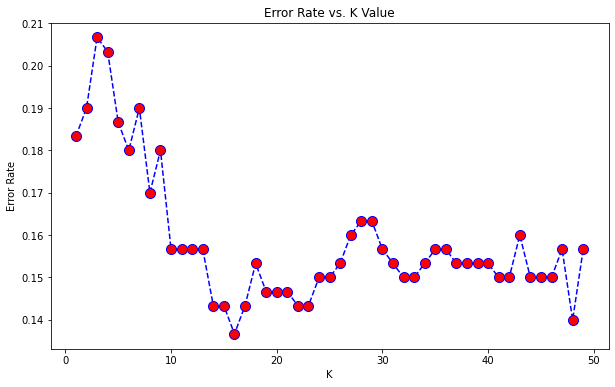

In [132]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(bas_X_train,y_train)
     pred_i = knn.predict(bas_X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [133]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2).fit(bas_X_train, y_train)

In [134]:
# Predicting the Test set results
knn_pred = knn.predict(bas_X_test)
knn.score(bas_X_test,y_test).round(3)

0.857

In [135]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[189  39]
 [  4  68]]


In [136]:
Error_rate = (39+4)/(300)
Error_rate

0.14333333333333334

In [137]:
Se = 68/(68+4)
Se

0.9444444444444444

In [138]:
Sp = 189/(189+39)
Sp

0.8289473684210527

KNN: ROC AUC=0.889


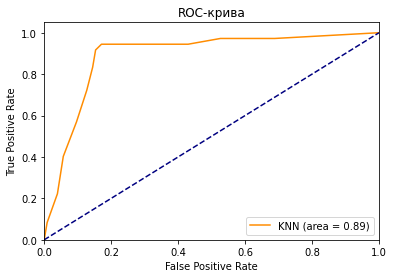

In [139]:
# отримуємо передбачення
knn_probs = knn.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
knn_probs = knn_probs[:, 1]
# рассчитываем ROC AUC
knn_auc = roc_auc_score(y_test, knn_probs)
print('KNN: ROC AUC=%.3f' % (knn_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Minimum error:- 0.19666666666666666 at K = 43


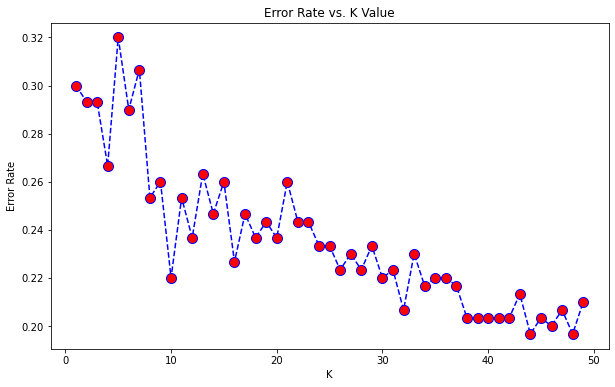

In [140]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn1 = KNeighborsClassifier(n_neighbors=i)
     knn1.fit(X_train,y_train)
     pred_i = knn1.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [141]:
# Fitting K-NN to the Training set (2 variables)
knn1 = KNeighborsClassifier(n_neighbors = 43, metric = 'minkowski', p = 2).fit(X_train, y_train)

In [142]:
# Predicting the Test set results
knn_pred = knn1.predict(X_test)
knn1.score(X_test,y_test).round(3)

0.787

In [143]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[180  48]
 [ 16  56]]


In [144]:
Error_rate = (16+48)/(300)
Error_rate

0.21333333333333335

In [145]:
Se = 56/(56+16)
Se

0.7777777777777778

In [146]:
Sp = 180/(180+48)
Sp

0.7894736842105263

KNN: ROC AUC=0.843


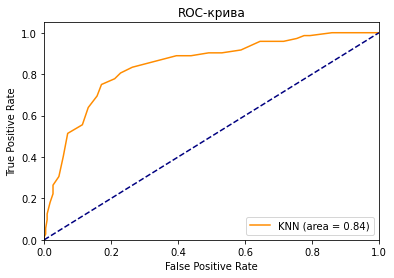

In [147]:
# отримуємо передбачення
knn1_probs = knn1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
knn1_probs = knn1_probs[:, 1]
# рассчитываем ROC AUC
knn1_auc = roc_auc_score(y_test, knn1_probs)
print('KNN: ROC AUC=%.3f' % (knn1_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, knn1_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [148]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(bas_X_train, y_train)

In [149]:
# Predicting the Test set results
nb_pred = nb.predict(bas_X_test)
nb.score(bas_X_test,y_test)

0.73

In [150]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_pred)
print(cm)

[[156  72]
 [  9  63]]


In [151]:
Error_rate = (9+72)/(300)
Error_rate

0.27

In [152]:
Se = 63/(63+9)
Se

0.875

In [153]:
Sp = 156/(156+72)
Sp

0.6842105263157895

KNN: ROC AUC=0.873


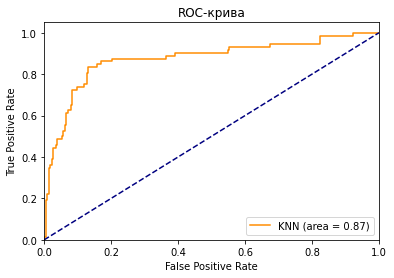

In [154]:
# отримуємо передбачення
nb_probs = nb.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
nb_probs = nb_probs[:, 1]
# рассчитываем ROC AUC
nb_auc = roc_auc_score(y_test, nb_probs)
print('KNN: ROC AUC=%.3f' % (nb_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, nb_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

In [155]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB().fit(X_train, y_train)

In [156]:
# Predicting the Test set results
nb1_pred = nb1.predict(X_test)
nb1.score(X_test,y_test)

0.6233333333333333

In [157]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb1_pred)
print(cm)

[[123 105]
 [  8  64]]


In [159]:
Error_rate = (8+105)/(300)
Error_rate

0.37666666666666665

In [161]:
Se = 64/(64+8)
Se

0.8888888888888888

In [162]:
Sp = 123/(123+105)
Sp

0.5394736842105263

KNN: ROC AUC=0.852


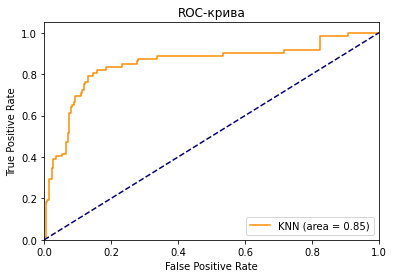

In [163]:
# отримуємо передбачення
nb1_probs = nb1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
nb1_probs = nb1_probs[:, 1]
# рассчитываем ROC AUC
nb1_auc = roc_auc_score(y_test, nb1_probs)
print('KNN: ROC AUC=%.3f' % (nb1_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, nb1_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Classification Tree

In [164]:
# Function Max Leaf
def max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

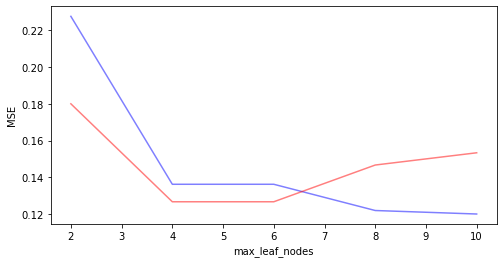

In [165]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [202]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes =4, criterion = 'entropy', random_state = 10).fit(bas_X_train, y_train)

In [203]:
# Predicting the Test set results
ct_pred = ct.predict(bas_X_test)
ct.score(bas_X_test,y_test)

0.8666666666666667

In [204]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ct_pred)
print(cm)

[[192  36]
 [  4  68]]


In [205]:
Error_rate = (4+36)/(300)
Error_rate

0.13333333333333333

In [206]:
Se = 68/(68+4)
Se

0.9444444444444444

In [207]:
Sp = 192/(192+36)
Sp

0.8421052631578947

KNN: ROC AUC=0.913


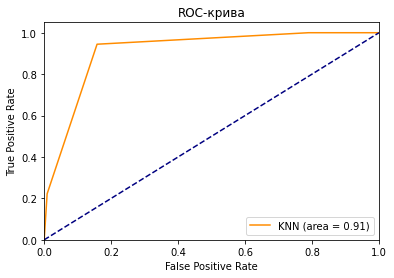

In [208]:
# отримуємо передбачення
ct_probs = ct.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
ct_probs = ct_probs[:, 1]
# рассчитываем ROC AUC
ct_auc = roc_auc_score(y_test, ct_probs)
print('KNN: ROC AUC=%.3f' % (ct_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, ct_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

In [209]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

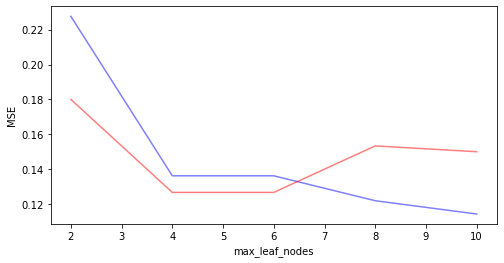

In [210]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [229]:
# Fitting Classification Tree to the Training set (2 variables)
ct1 = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [230]:
# Predicting the Test set results
ct_pred = ct1.predict(X_test)
ct1.score(X_test,y_test)

0.8666666666666667

In [231]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ct_pred)
print(cm)

[[192  36]
 [  4  68]]


In [232]:
Error_rate = (4+36)/(300)
Error_rate

0.13333333333333333

In [233]:
Se = 68/(68+4)
Se

0.9444444444444444

In [234]:
Sp = 192/(192+36)
Sp

0.8421052631578947

KNN: ROC AUC=0.900


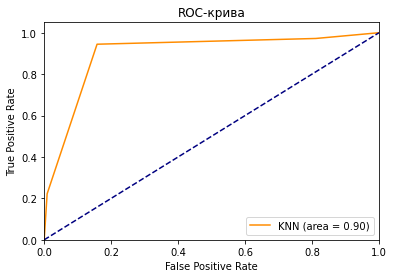

In [235]:
# отримуємо передбачення
ct1_probs = ct1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
ct1_probs = ct1_probs[:, 1]
# рассчитываем ROC AUC
ct1_auc = roc_auc_score(y_test, ct1_probs)
print('KNN: ROC AUC=%.3f' % (ct1_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, ct1_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Forest

In [236]:
def rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

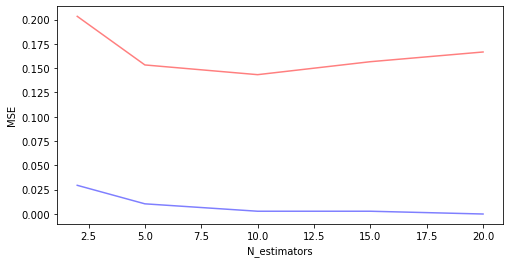

In [237]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [276]:
def rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes =i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

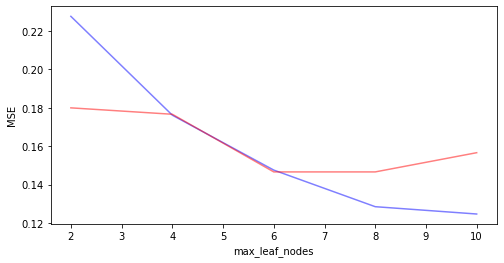

In [277]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [284]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 8, max_leaf_nodes = 5, random_state = 10).fit(bas_X_train, y_train)

In [285]:
# Predicting the Test set results
rf_pred = rf.predict(bas_X_test)
rf_pred = (rf_pred > 0.5)
rf.score(bas_X_test,y_test)

0.8733333333333333

In [286]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[195  33]
 [  5  67]]


In [287]:
Error_rate = (5+33)/(300)
Error_rate

0.12666666666666668

In [288]:
Se = 67/(67+5)
Se

0.9305555555555556

In [289]:
Sp = 195/(195+33)
Sp

0.8552631578947368

KNN: ROC AUC=0.914


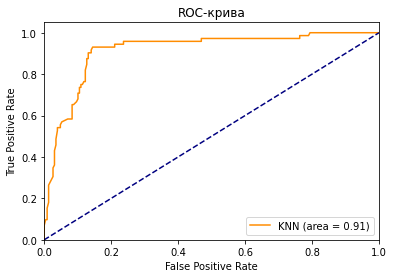

In [290]:
# отримуємо передбачення
rf_probs = rf.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
rf_probs = rf_probs[:, 1]
# рассчитываем ROC AUC
rf_auc = roc_auc_score(y_test, rf_probs)
print('KNN: ROC AUC=%.3f' % (rf_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

In [291]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

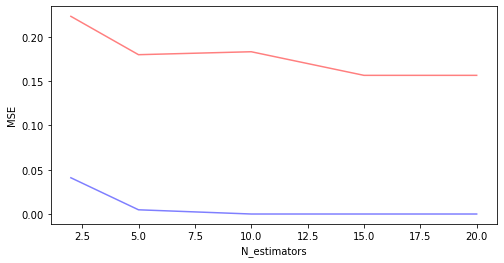

In [292]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [318]:
def rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

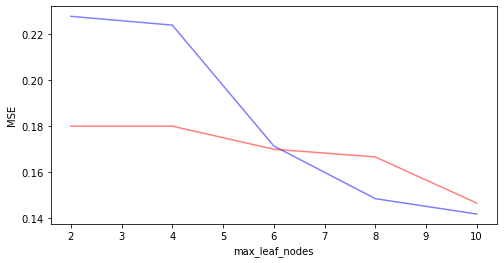

In [319]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [332]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, max_leaf_nodes = 5, random_state = 10).fit(X_train, y_train)

In [333]:
# Predicting the Test set results
rf_pred = rf.predict(X_test)
rf_pred = (rf_pred > 0.6)
rf.score(X_test,y_test)

0.8466666666666667

In [334]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[194  34]
 [ 12  60]]


In [335]:
Error_rate = (12+34)/(300)
Error_rate

0.15333333333333332

In [336]:
Se = 60/(60+12)
Se

0.8333333333333334

In [337]:
Sp = 194/(194+34)
Sp

0.8508771929824561

KNN: ROC AUC=0.883


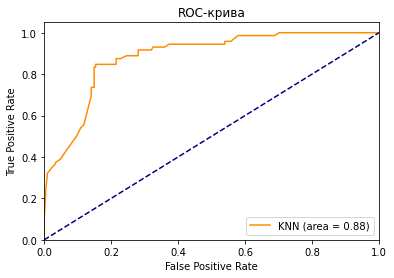

In [338]:
# отримуємо передбачення
rf_probs = rf.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
rf_probs = rf_probs[:, 1]
# рассчитываем ROC AUC
rf_auc = roc_auc_score(y_test, rf_probs)
print('KNN: ROC AUC=%.3f' % (rf_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Classification Neural Network

In [340]:
#Install Tensorflow
#Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [356]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 13, init = 'uniform', activation = 'linear', input_dim = 13))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", input_dim=13, units=13, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [357]:
# Fitting the ANN to the Training set
history = cnn.fit(bas_X_train, y_train, batch_size = 8, nb_epoch = 80, validation_data=(bas_X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1050 samples, validate on 300 samples
Epoch 1/80
1050/1050 [==============================] - 1s 501us/step - loss: 0.6314 - accuracy: 0.7790 - val_loss: 0.5566 - val_accuracy: 0.7333
Epoch 2/80
1050/1050 [==============================] - 0s 314us/step - loss: 0.4743 - accuracy: 0.8305 - val_loss: 0.4407 - val_accuracy: 0.8167
Epoch 3/80
1050/1050 [==============================] - 0s 313us/step - loss: 0.4128 - accuracy: 0.8638 - val_loss: 0.3851 - val_accuracy: 0.8400
Epoch 4/80
1050/1050 [==============================] - 0s 327us/step - loss: 0.3933 - accuracy: 0.8638 - val_loss: 0.3676 - val_accuracy: 0.8600
Epoch 5/80
1050/1050 [==============================] - 0s 366us/step - loss: 0.3878 - accuracy: 0.8629 - val_loss: 0.3601 - val_accuracy: 0.8600
Epoch 6/80
1050/1050 [==============================] - 0s 309us/step - loss: 0.3869 - accuracy: 0.8638 - val_loss: 0.3552 - val_accuracy: 0.8633
Epoch 7/80
1050/1050 [==============================] - 0s 311us/step - loss:

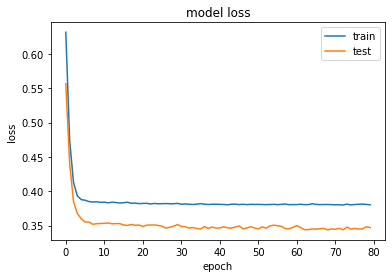

In [358]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [369]:
# Predicting the Test set results
y_pred = cnn.predict(bas_X_test)
y_pred = (y_pred > 0.59)

In [370]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[201  27]
 [  6  66]]


In [399]:
Accurary_rate = (201+66)/(300)
Accurary_rate

0.89

In [408]:
Error_rate = (27+6)/(300)
Error_rate

0.11

In [371]:
Se = 66/(66+6)
Se

0.9166666666666666

In [372]:
Sp = 201/(201+27)
Sp

0.881578947368421

KNN: ROC AUC=0.940


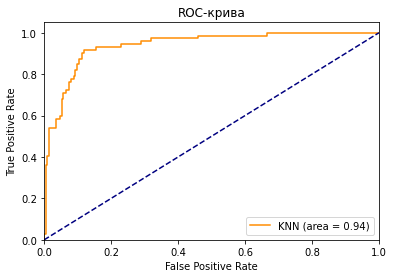

In [374]:
# отримуємо передбачення
cnn_probs = cnn.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
cnn_probs = cnn_probs[:, -1]
# рассчитываем ROC AUC
cnn_auc = roc_auc_score(y_test, cnn_probs)
print('KNN: ROC AUC=%.3f' % (cnn_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, cnn_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

In [376]:
# Initialising the ANN
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(output_dim = 33, init = 'uniform', activation = 'linear', input_dim = 33))

# Adding the output layer
cnn1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", input_dim=33, units=33, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [377]:
# Fitting the ANN to the Training set
history = cnn1.fit(X_train, y_train, batch_size = 2, nb_epoch = 100, validation_data=(X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1050 samples, validate on 300 samples
Epoch 1/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4916 - accuracy: 0.8133 - val_loss: 0.4051 - val_accuracy: 0.8433
Epoch 2/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3967 - accuracy: 0.8571 - val_loss: 0.3586 - val_accuracy: 0.8600
Epoch 3/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3871 - accuracy: 0.8590 - val_loss: 0.3678 - val_accuracy: 0.8667
Epoch 4/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3926 - accuracy: 0.8657 - val_loss: 0.3551 - val_accuracy: 0.8667
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3877 - accuracy: 0.8686 - val_loss: 0.3474 - val_accuracy: 0.8700
Epoch 6/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3878 - accuracy: 0.8629 - val_loss: 0.3538 - val_accuracy: 0.8733
Epoch 7/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3899

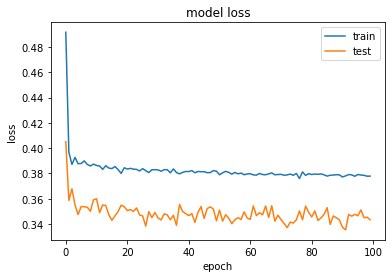

In [378]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [391]:
# Predicting the Test set results
y_pred = cnn1.predict(X_test)
y_pred = (y_pred > 0.44)

In [392]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[192  36]
 [  5  67]]


In [394]:
Accurary_rate = (192+67)/(300)
Accurary_rate

0.8633333333333333

In [395]:
Error_rate = (36+5)/(300)
Error_rate

0.13666666666666666

In [396]:
Se = 67/(67+5)
Se

0.9305555555555556

In [397]:
Sp = 192/(192+36)
Sp

0.8421052631578947

KNN: ROC AUC=0.940


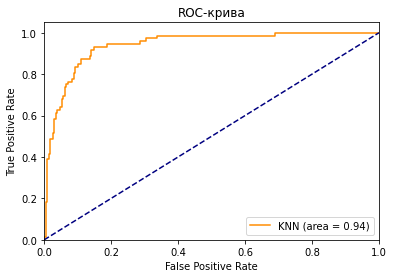

In [398]:
# отримуємо передбачення
cnn1_probs = cnn1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
cnn1_probs = cnn1_probs[:, -1]
# рассчитываем ROC AUC
cnn1_auc = roc_auc_score(y_test, cnn1_probs)
print('KNN: ROC AUC=%.3f' % (cnn1_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, cnn1_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()